# Classification

As we've previously seen, classification is a supervised machine learning technique. This training involves analysing a set of features and predict a label on already-known label values. 

Once again, in this model we will focus on binary classification (two classes). We will predict whether a patient should be tested for diabetes based on some medical data.

## Reading the data

First step is to read the diabetes data.


In [1]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


We can see that the data consists of numerous features, and the label diabetic at the end. 0 means the person is not diabetic, whilst 1 means the person is diabetic.

## Data cleaning

The next step will be to separate the features $X$ from the labels $y$.

In [9]:
features = list(data.columns)
target = 'Diabetic'

features.remove('PatientID')
features.remove(target)

X = data[features]
y = data[target]

## Data distribution

We can see how data is distributed for each feature that we have.

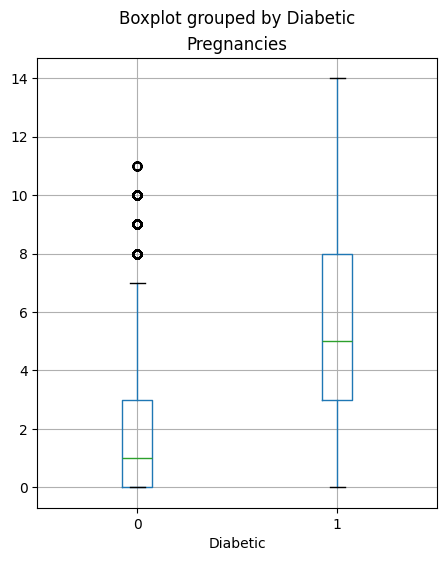

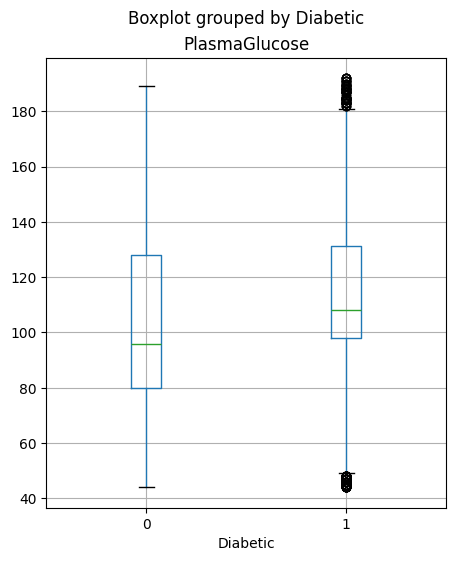

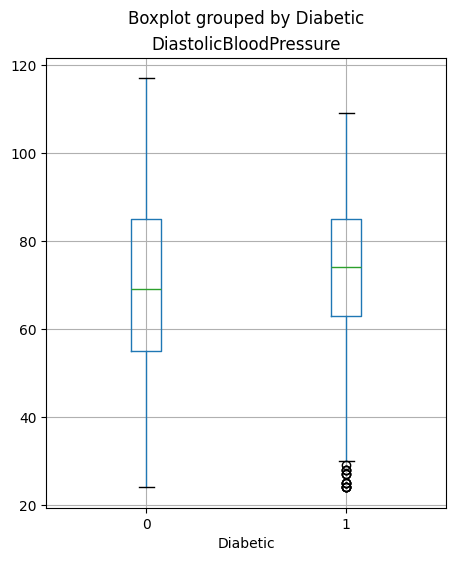

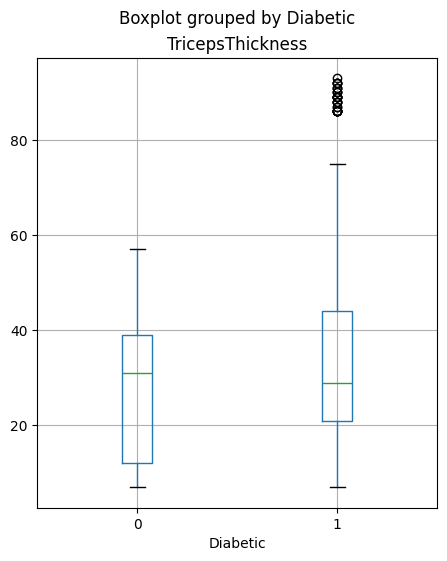

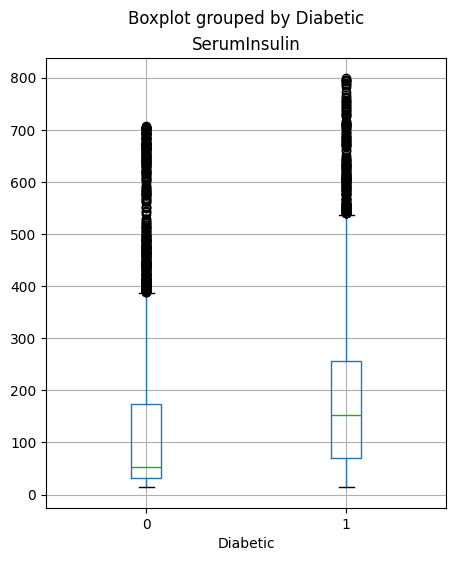

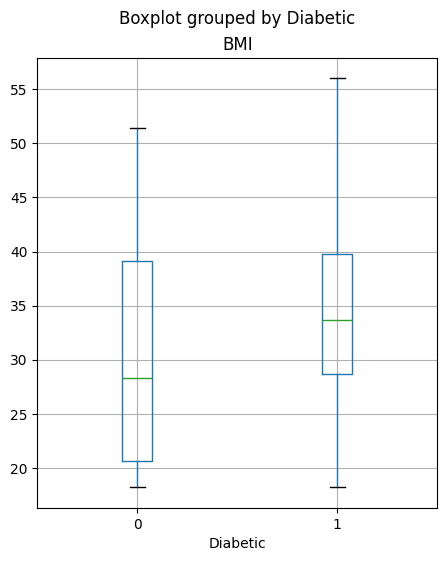

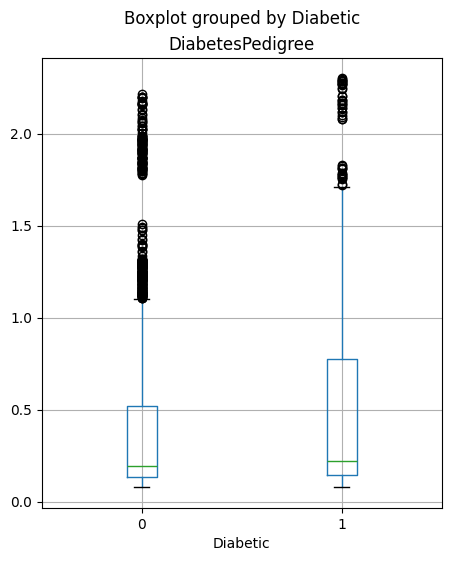

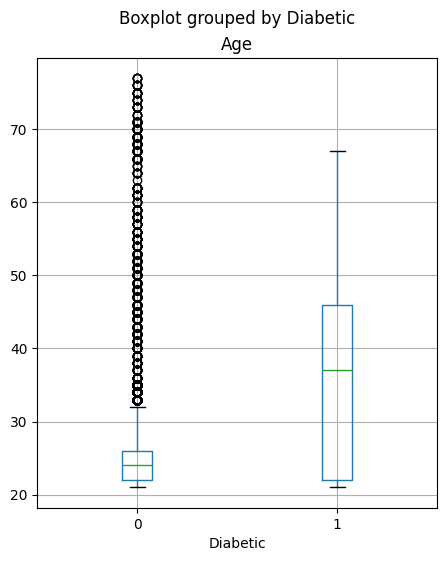

In [14]:
import matplotlib.pyplot as plt

for feature in features:
    data.boxplot(column=feature, by=target, figsize=(5,6))
    plt.title(feature)

If we look at Pregnancies and Age there is a different distribution for diabetic patients when compared to non-diabetic patients.

## Data Splitting

In order to test whether our trained model is performing well, we keep apart some of our data and then use this unseen data to test the prediction accuracy. 

We can start with a 70% training and 30% test split.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (f'Training: {X_train.shape[0]}')
print (f'Test    : {X_test.shape[0]}')

Training: 10500
Test    : 4500


## Train and Evaluate a Basic Decision Tree

So now we can train the model using the features of X_train, with the labels of y_train. 

There are various algorithms that can be used, in this example a simple Decision Tree be used.

In [19]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)

Now, the model is trained and we can use the test data to evaluate how well it predicts.

In [23]:
predictions = model.predict(X_test)
print ('Predicted: ', predictions[:15])
print ('Actual   : ', y_test[:15].values)

Predicted:  [0 0 0 1 0 0 1 0 0 1 0 0 1 1 0]
Actual   :  [0 1 0 0 0 0 1 0 0 0 0 0 1 1 1]


Since there are quite a lot of results, it will be difficult to directly compare the arrays of the prediction agains the actual labels.

We can use metrics to evaluate the performance of the model. For instance we can use accuracy metric.

In [26]:
from sklearn.metrics import accuracy_score, f1_score

print (f'Accuracy {accuracy_score(y_test, predictions):.2f}')
print (f'F1 Score {f1_score(y_test, predictions):.2f}')

Accuracy 0.89
F1 Score 0.83


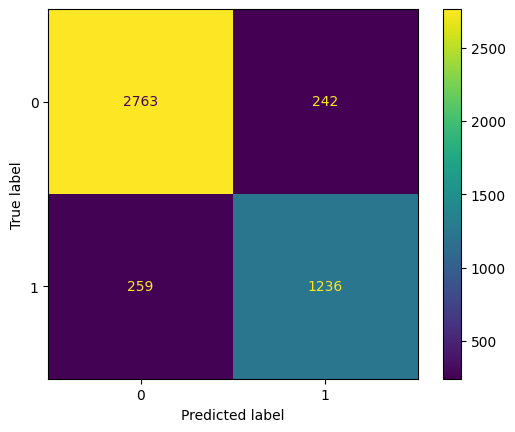

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

The accuracy is a percentage ranging from 0 (useless) to 1 (100% correctly predicted). In this case we have an accuracy of 78.93%.

For now, we are going to stop at accuracy. In a later example we will generate more metrics.

## Plotting the tree

We can also plot the tree to see how the classification is conducted.

For this we will need to unique labels and the feature names. The max_depth is set to 3 to allow for easier reading of the graph. This can be omitted or changed. In this case the leafs (end nodes) will not be shown.

[Text(0.5, 0.9, 'Pregnancies <= 1.5\ngini = 0.445\nsamples = 10500\nvalue = [6995.0, 3505.0]\nclass = 0'),
 Text(0.25, 0.7, 'Age <= 35.5\ngini = 0.072\nsamples = 5067\nvalue = [4878.0, 189.0]\nclass = 0'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'PlasmaGlucose <= 174.5\ngini = 0.039\nsamples = 4436\nvalue = [4347, 89]\nclass = 0'),
 Text(0.0625, 0.3, 'BMI <= 52.427\ngini = 0.034\nsamples = 4409\nvalue = [4332, 77]\nclass = 0'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'Pregnancies <= 0.5\ngini = 0.494\nsamples = 27\nvalue = [15, 12]\nclass = 0'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'BMI <= 22.171\ngini = 0.267\nsamples = 631\nvalue = [531, 100]\nclass = 0'),
 Text(0.3125, 0.3, 'PlasmaGlucose <= 175.5\ngini = 0.045\nsamples = 260\nvalue = [254, 6]\nclass = 0'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'BMI <= 28.764\

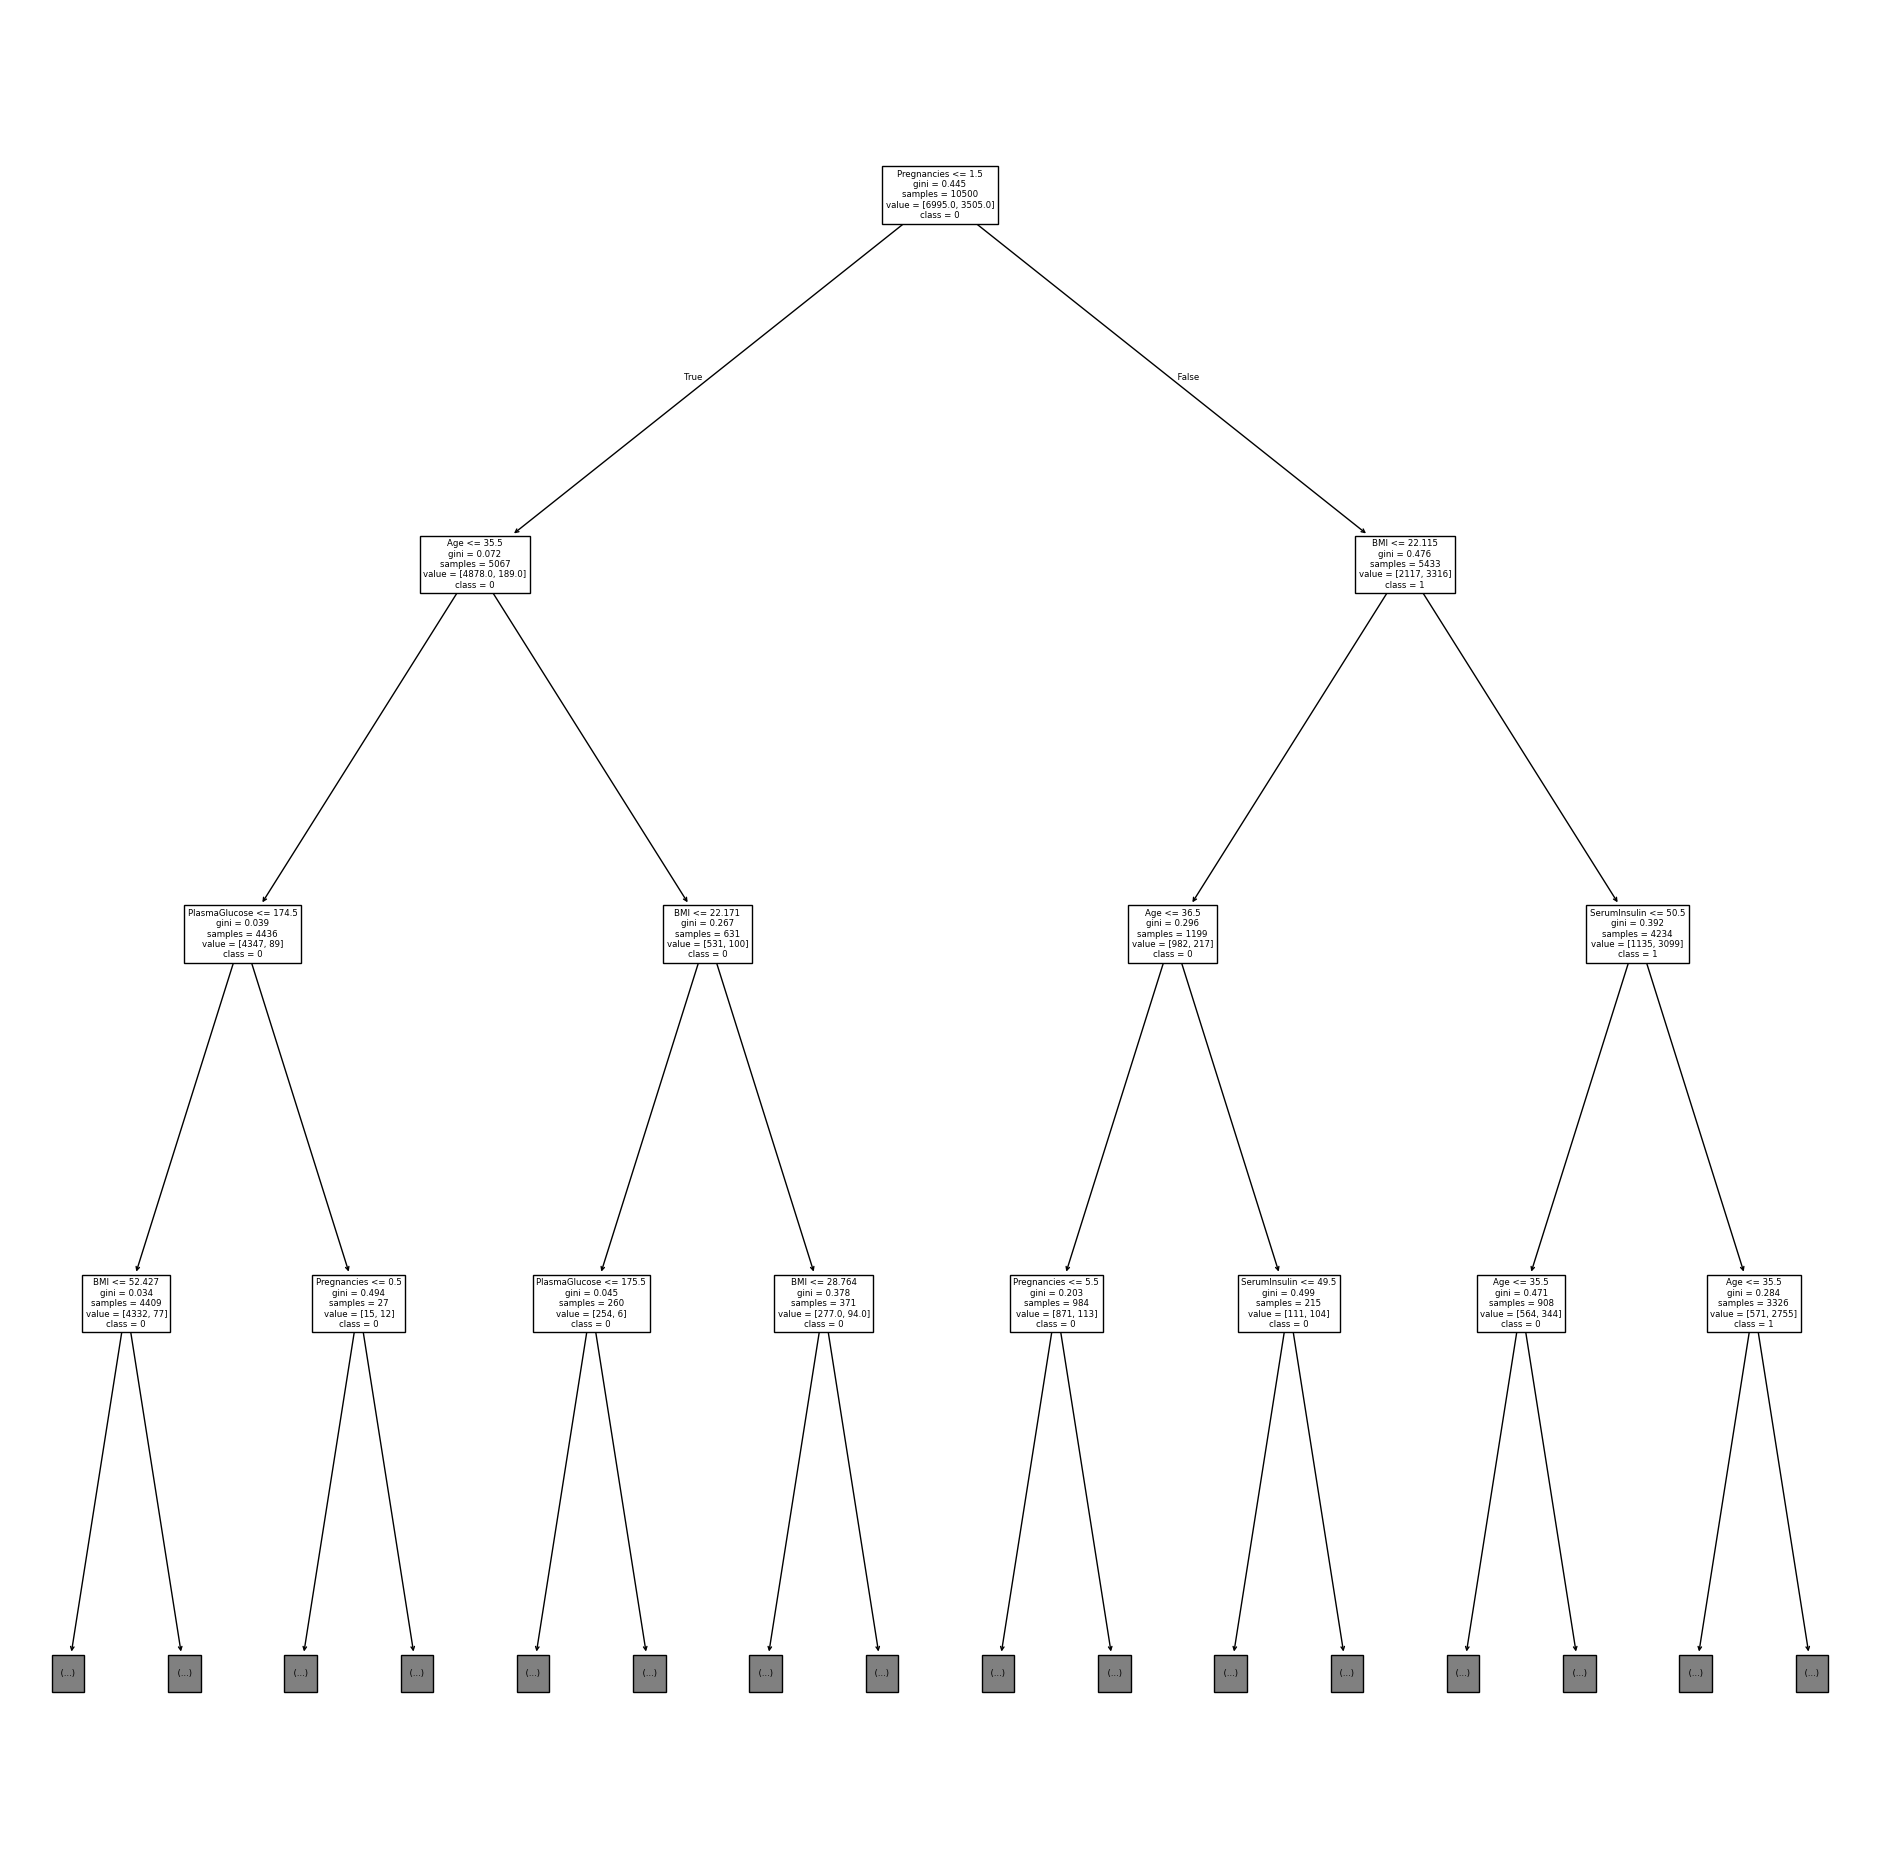

In [43]:
from sklearn import tree

labels = list(map(str, data[target].unique()))

plt.figure(figsize=(24,24))
tree.plot_tree(model, feature_names=features, class_names=labels, max_depth=3)


Looking at each node we can see:
- feature comparison (e.g. Pregnancies <=1.5) This is the question asked for the node, based on the result it either follows the true or false path.
- gini (e.g. 0.444) This is a metric that quantifies the purity of the node. If it's greater than 0 it says that there are samples in the node that belong to different classes. If it's zero it means that the node contains a single class.
- samples (e.g. 10500) - The amount of observations related to this node.
- value (e.g. [7014, 3486]) - How many samples of the node fall under each label. 
- class (e.g. 0) - This values shows the prediction a given node will make and it can be also observed from the value list (the bigger number)

## Reducing Features

Sometimes some features will not contribute (or very little) to the model. We can use PCA (principal component analysis) to remove such features.

First we will create a PCA with all the 8 features, and plot a chart to see how many components are needed to explain 100% of the data.

[0.91  0.962 0.976 0.987 0.994 0.999 1.    1.   ]


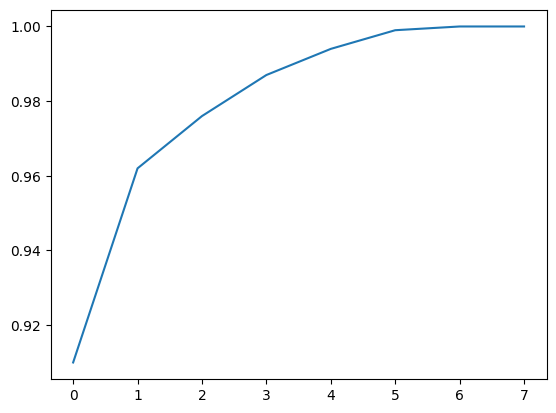

In [51]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA().fit(X_train)
s = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3))

print(s)

plt.plot(s)

We can see that at 6 components, we meet 100% of the data explained. So we can remove the unwanted columns.

In [52]:
pca = PCA(n_components=6).fit(X_train)

X_train_pca  = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

Accuracy 0.82
F1 Score 0.73


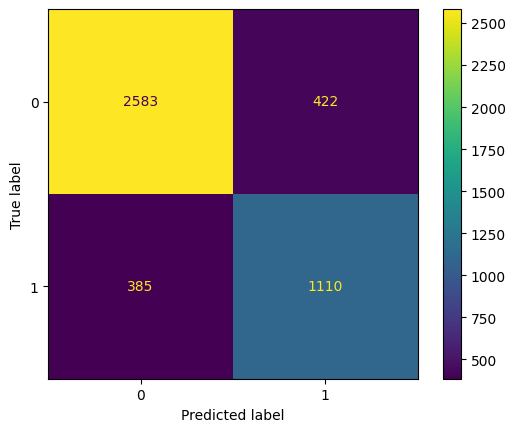

In [53]:
model = DecisionTreeClassifier(random_state=42).fit(X_train_pca, y_train)
predictions = model.predict(X_test_pca)
print (f'Accuracy {accuracy_score(y_test, predictions):.2f}')
print (f'F1 Score {f1_score(y_test, predictions):.2f}')

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()